# ***USA housing Prediction***:
 It contains 4140 entries and 18 columns, each representing different attributes related to the properties. This data is often used to analyze real estate trends, predict housing prices, and understand the factors that influence the value of homes.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/USA Housing Dataset.csv")

# Data Overview

In [ ]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# Handling missing data

In [ ]:
# Check if any column contains null values
dataset.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


# Duplicates

In [ ]:
dataset.duplicated().sum()

0

# Handling outliers

In [ ]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
print(dataset.shape)


dataset = dataset[(dataset['price'] >= lower_bound) & (dataset['price'] <= upper_bound)]
print(dataset.shape)

(4140, 18)
(3925, 18)


# Second Case of handling outliers in every feature

In [ ]:
# Select only numeric columns from the dataset
#numeric_columns = dataset.select_dtypes(include=['number'])

#Q1 = numeric_columns.quantile(0.25)
#Q3 = numeric_columns.quantile(0.75)

# Calculate the interquartile range (IQR) for each column
#IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection for each column
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each column
#outliers_per_column = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).sum()

#print("Number of outliers for each column:")
#print(outliers_per_column)

In [ ]:
#outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

# Replace outliers with the median of the respective column
#for column in numeric_columns.columns:
   # median_value = numeric_columns[column].median()
   # numeric_columns.loc[outliers[column], column] = median_value
# Identify outliers for each column
#outliers_per_column = ((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).sum()

#print("Number of outliers for each column:")
#print(outliers_per_column)

# Data visualization

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

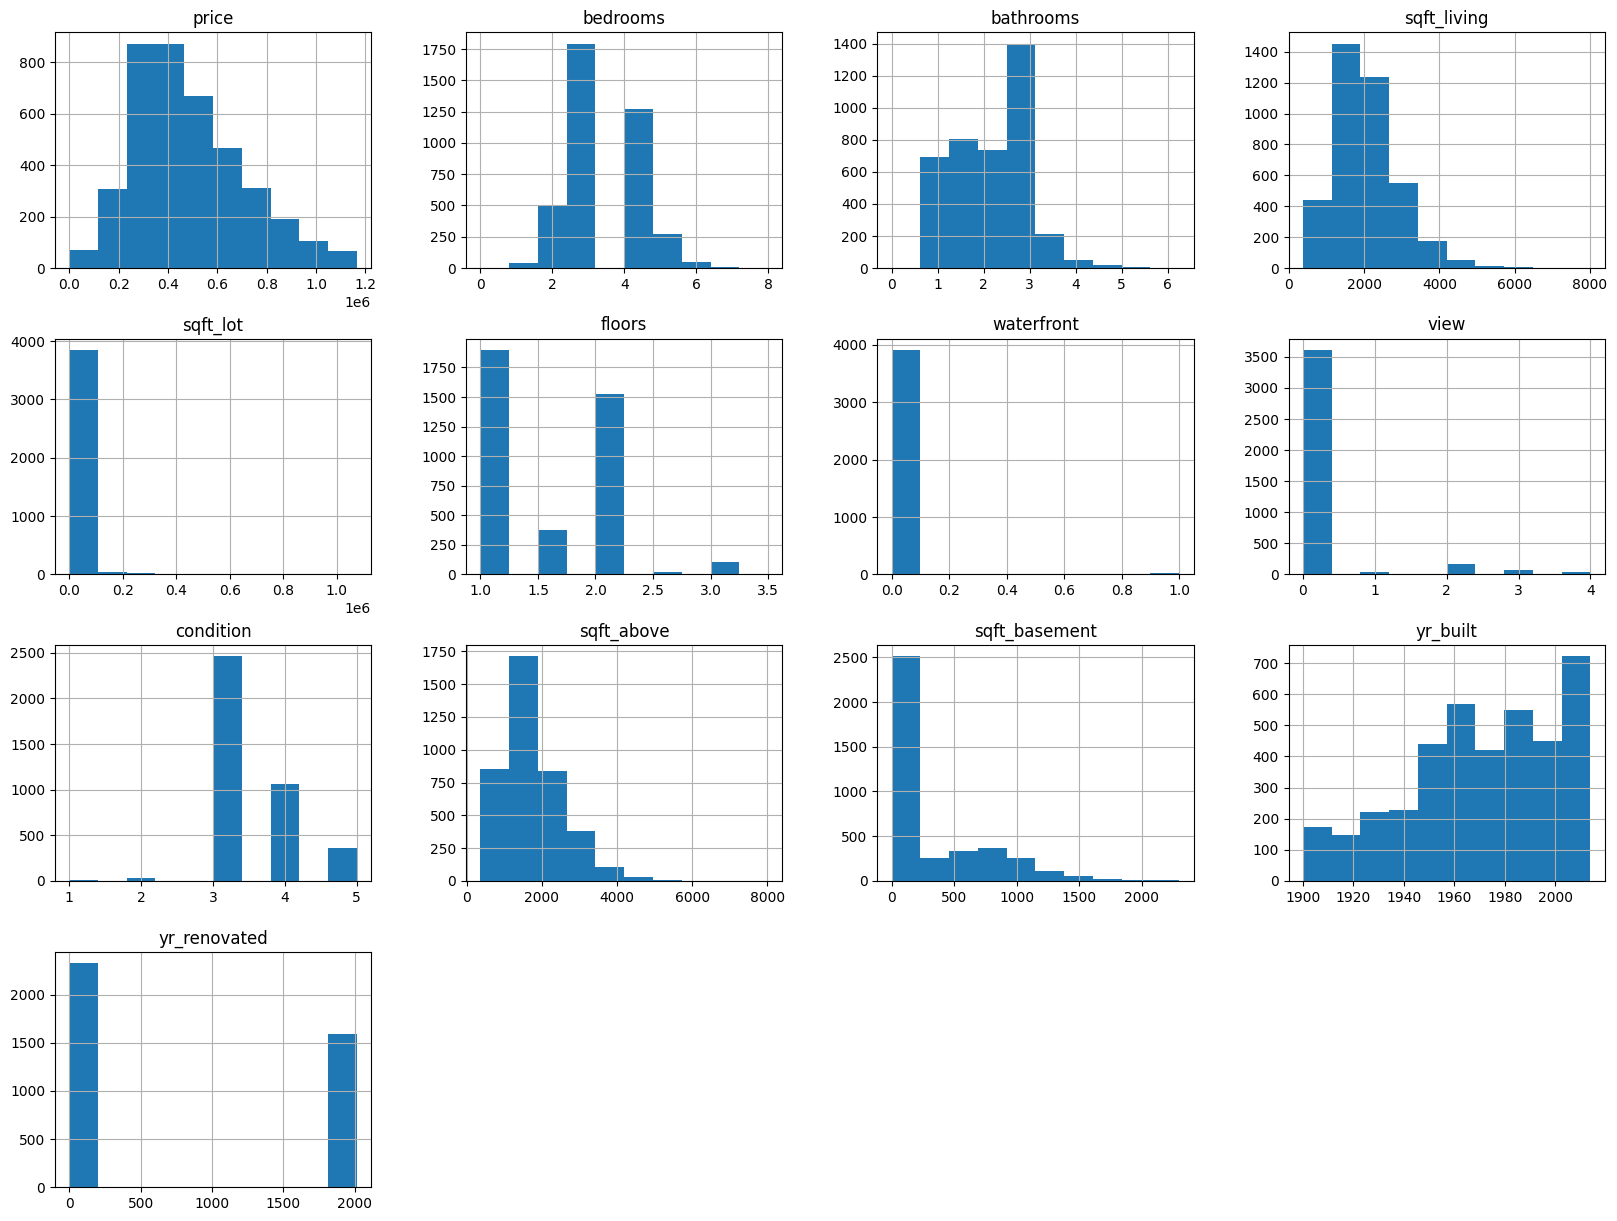

In [ ]:
dataset.hist(figsize=(20,15))

# Encoding categorical data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3925 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3925 non-null   object 
 1   price          3925 non-null   float64
 2   bedrooms       3925 non-null   float64
 3   bathrooms      3925 non-null   float64
 4   sqft_living    3925 non-null   int64  
 5   sqft_lot       3925 non-null   int64  
 6   floors         3925 non-null   float64
 7   waterfront     3925 non-null   int64  
 8   view           3925 non-null   int64  
 9   condition      3925 non-null   int64  
 10  sqft_above     3925 non-null   int64  
 11  sqft_basement  3925 non-null   int64  
 12  yr_built       3925 non-null   int64  
 13  yr_renovated   3925 non-null   int64  
 14  street         3925 non-null   object 
 15  city           3925 non-null   object 
 16  statezip       3925 non-null   object 
 17  country        3925 non-null   object 
dtypes: float64(4)

In [ ]:
#encode street, city,statezip ,handling date
print (dataset['street'].nunique())
print (dataset['city'].nunique())
print (dataset['statezip'].nunique())


3867
43
77


due to so many unique values, one hot encoder would create a large number of columns, so we will use Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
dataset['street']=label_encoder.fit_transform(dataset['street'])
dataset['city']=label_encoder.fit_transform(dataset['city'])
dataset['statezip']=label_encoder.fit_transform(dataset['statezip'])
dataset['country']=label_encoder.fit_transform(dataset['country'])


In [ ]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.000000,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,3761,34,47,0
1,2014-05-09 00:00:00,800000.000000,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,2374,7,10,0
3,2014-05-09 00:00:00,324000.000000,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,3569,34,56,0
4,2014-05-10 00:00:00,549900.000000,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,170,34,65,0
5,2014-05-10 00:00:00,320000.000000,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,3855,20,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,2944,34,62,0
4136,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,833,3,6,0
4137,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,3449,31,37,0
4138,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2990,34,71,0


# Handling Date

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['HourOfDay']=dataset['date'].dt.hour
dataset['DayOfWeek']=dataset['date'].dt.dayofweek
dataset['Year']=dataset['date'].dt.year
dataset= dataset.drop('date',axis =1)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,HourOfDay,DayOfWeek,Year
0,376000.000000,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,3761,34,47,0,0,4,2014
1,800000.000000,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,2374,7,10,0,0,4,2014
3,324000.000000,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,3569,34,56,0,0,4,2014
4,549900.000000,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,170,34,65,0,0,5,2014
5,320000.000000,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,3855,20,23,0,0,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,2944,34,62,0,0,2,2014
4136,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,833,3,6,0,0,2,2014
4137,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,3449,31,37,0,0,2,2014
4138,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2990,34,71,0,0,3,2014


# Feature selection and engineering

In [ ]:
dataset=dataset.drop('country',axis = 1)
# Create 'total_sqft' feature
dataset['total_sqft'] = dataset['sqft_above'] + dataset['sqft_basement']
dataset['total_rooms'] = dataset['bedrooms'] + dataset['bathrooms']
#dataset['bed_bath_ratio'] = dataset['bedrooms'] / dataset['bathrooms']

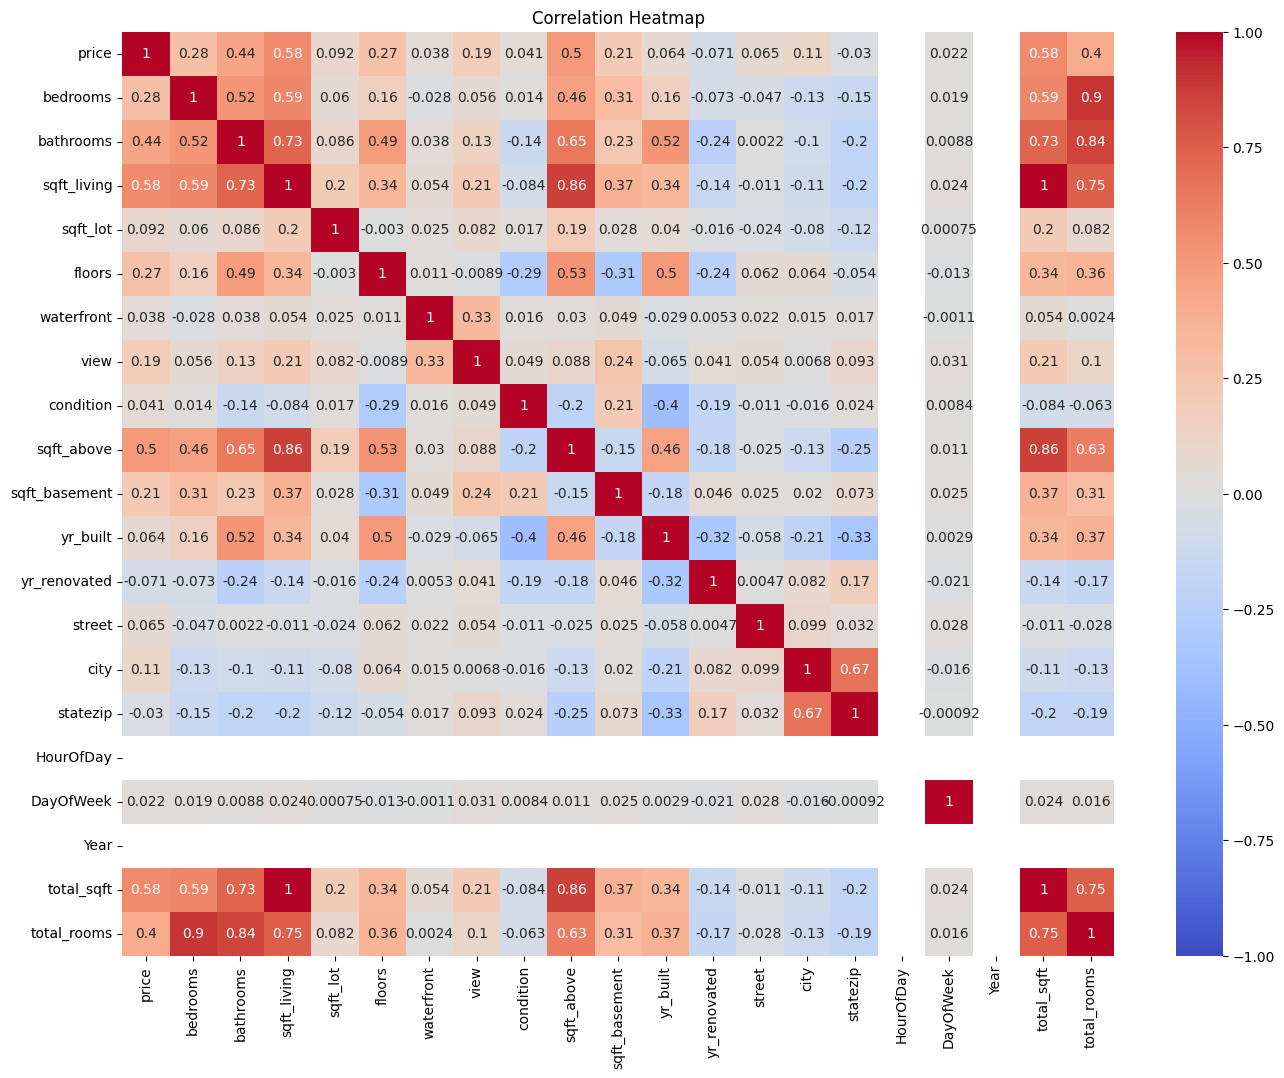

In [ ]:
correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Feature selection

In [ ]:
# Compute correlation between each feature and the target column
correlation_with_target = dataset.drop(columns=['price']).corrwith(dataset['price'])

# Threshold for low correlation
threshold = 0.2  # Adjust as needed

# Identify features with low correlation with the target column
less_correlated_columns = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()

print("Columns with low correlation with 'price':")
print(less_correlated_columns)

Columns with low correlation with 'price':
['sqft_lot', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'DayOfWeek']


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
variance_threshold = 0.1  # Adjust as needed

# Threshold for low correlation
correlation_threshold = 0.1  # Adjust as needed

# Compute variance for each column (excluding 'price')
variances = dataset.drop(columns=['price']).var()

# Compute correlation between each feature and the 'price' column
correlation_with_target = dataset.drop(columns=['price']).apply(lambda x: x.corr(dataset['price']))

# Identify columns with low variance and low correlation with 'price'
less_correlated_columns = variances[(variances < variance_threshold) & (abs(correlation_with_target) < correlation_threshold)].index.tolist()

print("Columns with low variance and low correlation with 'price':")
print(less_correlated_columns)

Columns with low variance and low correlation with 'price':
['waterfront']


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.drop('price',axis = 1)
y = dataset['price']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Normalization Cases
Standardization process converts data to smaller values in the range 0 to 1 so that all of them lie on the same scale and one doesn’t overpower the other

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_train= scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

In [ ]:
#to make less scaler
#from sklearn.discriminant_analysis import StandardScaler


#sc = StandardScaler() #mean equal 0,stand =1 to be normal distribution (normalize data)
#x_train= sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import RobustScaler

 # Create a RobustScaler object
scaler = RobustScaler()

 # Fit the scaler to the training data (calculate median and IQR)
scaler.fit(x_train)

 # Transform the training and testing data using the fitted scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#from sklearn.model_selection import KFold
#from sklearn.feature_selection import SelectKBest, f_classif
#kbest = SelectKBest(score_func=f_classif, k=8)

 # Fit SelectKBest on training data and transform it
#x_train = kbest.fit_transform(x_train,y_train)

 # Transform test data using the same feature selection
#x_test = kbest.transform(x_test)

# Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
print("Linear regression train accuracy")
reg.score(x_train,y_train)

Linear regression train accuracy


0.4218260355365536

R2 score

In [ ]:
print("Linear regression test accuracy")
reg.score(x_test,y_test)

Linear regression test accuracy


0.3756772657224464

# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=40,max_depth=5,min_samples_split= 5,criterion='absolute_error')
forest.fit(x_train,y_train)
print("Random forrest train accuracy")
forest.score(x_train,y_train)

Random forrest train accuracy


0.5584655014535866

In [ ]:
print("Random forrest test accuracy")
forest.score(x_test,y_test)

Random forrest test accuracy


0.5034182849952056

# Hyper parameter tuning for Random forrest

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    'n_estimators' : [ 50,60,70],
    'max_features' : [11,12,14]
    }
grid_search = GridSearchCV(forest,param_grid,cv = 5 , scoring = "neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [11, 12, 14],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=14, n_estimators=70)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
print("accuracy of Random forrest after tuning")
best_forest.score(x_test,y_test)

accuracy of Random forrest after tuning


0.5959166624331171

# XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

0.9838591088135428

In [ ]:
xgb.score(x_test,y_test)

0.6299844316404337